In [34]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [35]:
# y = 4x + 6
X = 2 * np.random.rand(100, 1)

In [36]:
Y = 4 * X + 6 + np.random.randn(100, 1) # 뒤 random은 노이즈(임의로 만들어준), 앞의 값이 실제 값

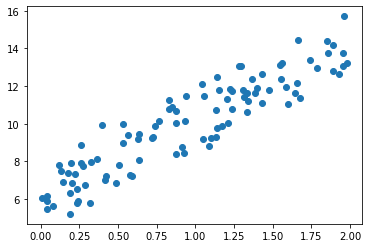

In [37]:
plt.scatter(X, Y)

In [38]:
def get_cost(Y, Y_pred):
    N = len(Y)
    cost = np.sum(np.square(Y - Y_pred)) / N
    return cost

In [39]:
def get_weight_updates(w1, w0, X, Y, learning_rate=0.01):
    N = len(Y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    Y_pred = np.dot(X, w1.T) + w0 # dot: 행렬 곱
    diff = Y - Y_pred

    w0_factors = np.ones((N, 1))

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [40]:
def gradient_descent_steps(X, Y, iters=10000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    for ind in range(iters):
        w1_updates, w0_updates = get_weight_updates(w1, w0, X, Y, learning_rate=0.01)
        w1 = w1 - w1_updates
        w0 = w0 - w0_updates
    return w1, w0

In [41]:
w1, w0 = gradient_descent_steps(X, Y, iters=10000)
w1, w0

(array([[3.96846751]]), array([[6.22215108]]))

In [42]:
Y_pred = w1[0, 0] * X + w0[0, 0]   # w1[0][0] == w1[0, 0]
get_cost(Y, Y_pred)

0.9924386487246484

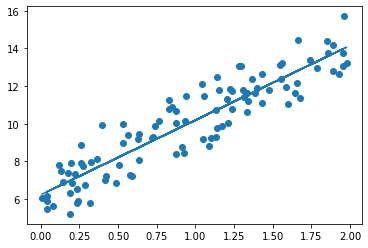

In [43]:
plt.scatter(X, Y)
plt.plot(X, Y_pred)

In [52]:
def stochastic_gradient_descent_steps(X, Y, batch_size=10, iters=1000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index= 0
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_Y = Y[stochastic_random_index[0:batch_size]]
        w1_updates, w0_updates = get_weight_updates(w1, w0, sample_X, sample_Y, learning_rate=0.01)
        w1 = w1 - w1_updates
        w0 = w0 - w0_updates
    return w1, w0

In [53]:
w1, w0 = stochastic_gradient_descent_steps(X, Y, iters=1000)
print(w1[0, 0], w0[0, 0])
Y_pred = w1[0, 0] * X + w0[0, 0]   # w1[0][0] == w1[0, 0]
print(get_cost(Y, Y_pred))

4.028262908613388 6.156458908870072
0.9937111256675345
